### import statements

In [1]:
%matplotlib inline
import sys
import os
import pandas as pd
sys.path.append('../src')
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pvlib.solarposition import get_solarposition

### constants

In [2]:
F_INPUT = '../../data/v2/data.h5'

In [3]:
DENSE_SUBSET_START = '2018-05-03 00:00'
DENSE_SUBSET_END = '2020-12-30 00:00'

In [4]:
feat = 'solar_zenith_angle'

### read data

In [5]:
df = pd.read_hdf(F_INPUT, 'merged')

### pick a start and end date

In [6]:
startdate = datetime.strptime(DENSE_SUBSET_START, '%Y-%m-%d %H:%M')
enddate = datetime.strptime(DENSE_SUBSET_END, '%Y-%m-%d %H:%M')
mask = (df.index >= startdate) & (df.index <= enddate)
df_subset = df[mask]

### calculate sza from pvlib

In [7]:
df_sza = get_solarposition(df_subset.index, 34.380000000000003, -1.176800000000000e+02, altitude=2280)

### plot SZA from adta

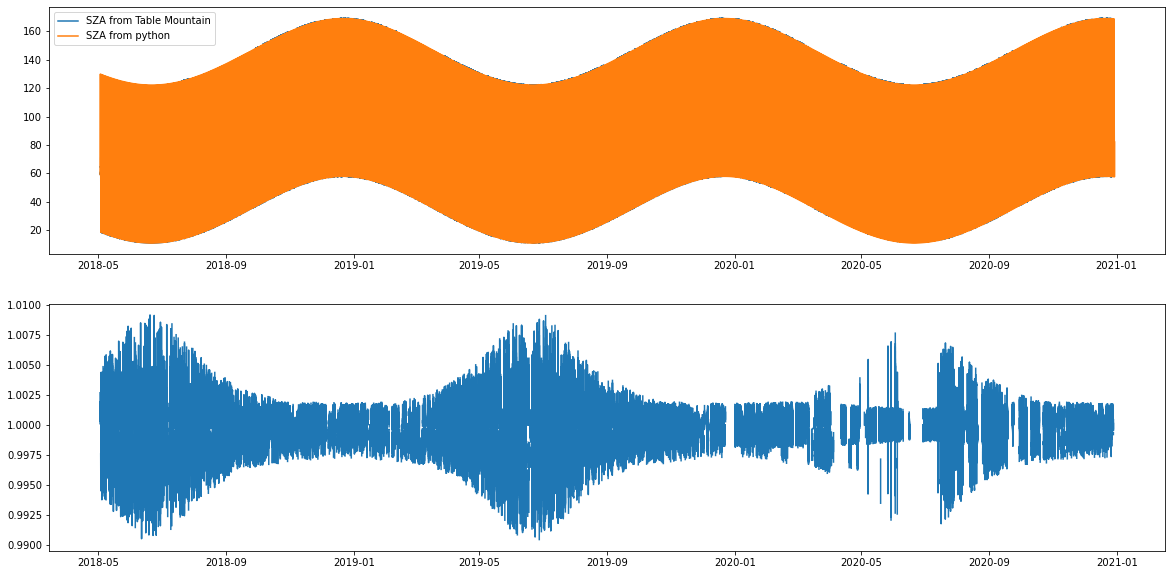

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
ax[0].plot(df_subset[feat], label='SZA from Table Mountain')
ax[0].plot(df_sza['zenith'], label='SZA from python')
ax[1].plot(df_subset[feat]/df_sza['zenith'])
ax[0].set_ylabel='SZA'
ax[1].set_ylabel='Ratio of Tbl Mount to Python SZA'
ax[0].legend()
plt.show()

In [9]:
(df_subset[feat]/df_sza['zenith']).min()

0.99046679002793

In [10]:
(df_subset[feat]/df_sza['zenith']).max()

1.009139683830725

In [11]:
np.amin(np.abs(df_subset[feat]-df_sza['zenith']))

1.9530494910213747e-07

In [12]:
np.amax(np.abs(df_subset[feat]-df_sza['zenith']))

0.2604227803027328